# Linear Regression with PyTorch

## Linear Regression Introduction

$$
y = \alpha x + \beta
$$

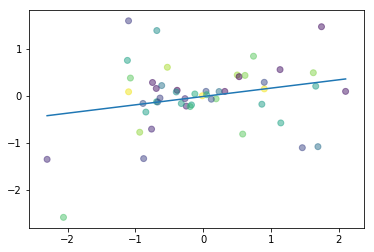

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
f = np.poly1d(np.polyfit(x, y, 1))
plt.plot(np.unique(x), f(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## Linear Regression in PyTorch

In [9]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
x_train = np.array(x_values, dtype=np.float32)
x_train

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.], dtype=float32)

In [16]:
x_train.shape

(11,)

In [18]:
x_train = x_train.reshape(-1, 1)
x_train

array([[  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)

In [19]:
x_train.shape

(11, 1)

$$
y = 2x+1
$$

In [21]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [22]:
y_train = np.array(y_values, dtype=np.float32)

In [24]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [29]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [32]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:
epochs = 1000
for epoch in range(1, epochs+1):
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # clear gradients w.r.t. parameters
    # start fresh each epoch
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t. parameters
    loss.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'epoch {epoch}, loss {loss.data[0]}')

epoch 100, loss 1.5593505653388462e-11
epoch 200, loss 1.5593505653388462e-11
epoch 300, loss 1.5593505653388462e-11
epoch 400, loss 1.5593505653388462e-11
epoch 500, loss 1.5593505653388462e-11
epoch 600, loss 1.5593505653388462e-11
epoch 700, loss 1.5593505653388462e-11
epoch 800, loss 1.5593505653388462e-11
epoch 900, loss 1.5593505653388462e-11
epoch 1000, loss 1.5593505653388462e-11


In [39]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.99999267],
       [  2.9999938 ],
       [  4.99999523],
       [  6.99999666],
       [  8.99999714],
       [ 10.99999809],
       [ 13.        ],
       [ 15.00000095],
       [ 17.00000191],
       [ 19.00000381],
       [ 21.00000381]], dtype=float32)

In [40]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

## Linear Regression From CPU to GPU in PyTorch

In [41]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
if torch.cuda.is_available():
    model = model.cuda()

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 1000
for epoch in range(1, epochs+1):
    # convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    if torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()

    # clear gradients w.r.t. parameters
    # start fresh each epoch
    optimizer.zero_grad()
    
    outputs = model(inputs)
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t. parameters
    loss.backward()
    
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'epoch {epoch}, loss {loss.data[0]}')

epoch 100, loss 0.11773843318223953
epoch 200, loss 0.038301873952150345
epoch 300, loss 0.012460153549909592
epoch 400, loss 0.004053415730595589
epoch 500, loss 0.0013186474097892642
epoch 600, loss 0.00042897972161881626
epoch 700, loss 0.00013954838505014777
epoch 800, loss 4.5398515794659033e-05
epoch 900, loss 1.4769234439881984e-05
epoch 1000, loss 4.80458857055055e-06
